# Homework 4 - Part 1
## SVD-based image reconstruction:

In [1]:
# Image reconstruction from the SVD
from matplotlib import image as im
from matplotlib import pyplot as plt
import numpy as np
import numpy.linalg as la

# I/O
X = im.imread("./data/hendrix_final.png")
X_arr = X.astype(np.float32)

# Rescaling the image to be in [0,1]
X_arr = (X_arr - np.min(X_arr))/(np.max(X_arr)-np.min(X_arr))

# Extracting the SVD separately for R, G and B channels
Xr = X_arr[:,:,0]
Xg = X_arr[:,:,1]
Xb = X_arr[:,:,2]

### 2. Execute the SVD separately on the R, G and B channels of the image. Plot (using a log-log plot) the non-zero singular values for the R channel. Comment on the nature of the plot, specifically the drop in singular values for each channel.

In [ ]:
# Executing SVD spearatly for each channel
Ur, Sr, Vr = la.svd(Xr)
Ug, Sg, Vg = la.svd(Xg)
Ub, Sb, Vb = la.svd(Xb)

M, N, D = X.shape  # D should be 3 for a standard color image
K = np.min([M, N]) # Maximum number of reconstructions is the minimum of M and N

# X_recon is the reconstruction from the SVD
X_recon = np.zeros([M, N, D])
UV_recon = np.zeros([M, N, D])
X_recon_err = la.norm(X_arr-X_recon)

X_rec_err_arr = np.zeros(K+1)
X_rec_err_arr[0] = X_recon_err

X_rec_err_arr_r = np.zeros(K+1)
X_rec_err_arr_r[0] = la.norm(X_arr[:,:,0]-X_recon[:,:,0])

X_rec_err_arr_g = np.zeros(K+1)
X_rec_err_arr_g[0] = la.norm(X_arr[:,:,1]-X_recon[:,:,1])

X_rec_err_arr_b = np.zeros(K+1)
X_rec_err_arr_b[0] = la.norm(X_arr[:,:,2]-X_recon[:,:,2])

for k in range(0, K):
    # Rank 1 outer products of u and v^T
    # ACHTUNG: Note the indexing on V. It is reversed because of how numpy computes the SVD bases
    UV_recon[:,:,0] = np.outer(Ur[:,k], Vr[k, :])
    UV_recon[:,:,1] = np.outer(Ug[:,k], Vg[k, :])
    UV_recon[:,:,2] = np.outer(Ub[:,k], Vb[k, :])
    X_recon[:,:,0] += Sr[k]*np.outer(Ur[:,k], Vr[k, :])
    X_recon[:,:,1] += Sg[k]*np.outer(Ug[:,k], Vg[k, :])
    X_recon[:,:,2] += Sb[k]*np.outer(Ub[:,k], Vb[k, :])

    # Computing the norm of the reconstruction error. Note that X_recon is a tensor (M by N by D)
    # Also, the default norm of the la.norm of a matrix IS the Frobenius Norm.
    X_recon_err_r = la.norm(X_arr[:,:,0]-X_recon[:,:,0])
    X_rec_err_arr[k+1] = X_recon_err_r

    X_recon_err_g = la.norm(X_arr[:,:,1]-X_recon[:,:,1])
    X_rec_err_arr_r[k+1] = X_recon_err_g

    X_recon_err_b = la.norm(X_arr[:,:,2]-X_recon[:,:,2])
    X_rec_err_arr_g[k+1] = X_recon_err_b

    X_recon_err = la.norm(X_arr - X_recon)
    X_rec_err_arr_b[k+1] = X_recon_err

    # Pick iteration 27
    if(k == 27):
      good_enough = (X_recon*255).astype(np.uint8)

# After loop, show singular values of the red channel
plt.loglog(Sr)
plt.title("Log-Log Plot of the Singular Values for the Red channel")
plt.show()

# Explanation of behavior:
#.  Since this is a log-log plot, we are analyzing logarithmic behavior of the function.
#.  The singular value quickly goes to zero as the iterations exponentially grow.
#.  Since the image is 2000x2000, the first 1000 iterations show a slight decline.
#.  However, there is a steep decline at the next 1000 iterations, and the singular value
#   Drastically descreases close to zero (6.1e-04 in this case).
#
# Why are the values in descending order?
#.  Convention. When using the la.svd() function, the resulting S matrix will have
#.  the Singular Values going in descending order in the diagonal of the matrix.
#.  You can rearrange the values and permute the columns of the matrix (properly)
#.  and still have the same matrix.

### 3. Plot the Frobenius norm of the reconstruction error matrix for each channel w.r.t. the dimension (increasing from 1 to the rank).

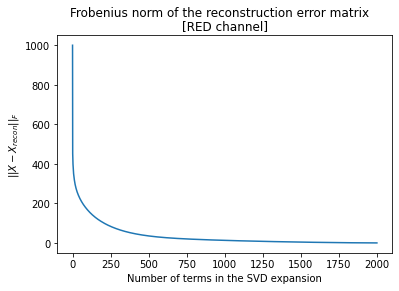

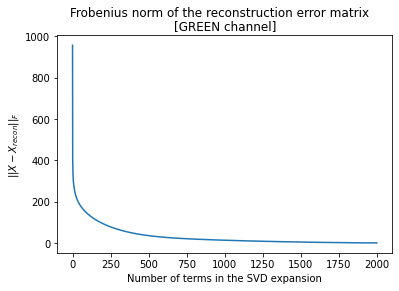

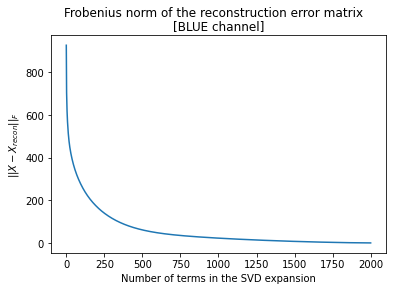

In [ ]:
# Red
plt.suptitle("Frobenius norm of the reconstruction error matrix")
plt.title("[RED channel]")
plt.plot(X_rec_err_arr_r)
plt.xlabel("Number of terms in the SVD expansion")
plt.ylabel(r"$||X-X_{recon}||_F$")
plt.show()

# Green
plt.suptitle("Frobenius norm of the reconstruction error matrix")
plt.title("[GREEN channel]")
plt.plot(X_rec_err_arr_g)
plt.xlabel("Number of terms in the SVD expansion")
plt.ylabel(r"$||X-X_{recon}||_F$")
plt.show()

# Blue
plt.suptitle("Frobenius norm of the reconstruction error matrix")
plt.title("[BLUE channel]")
plt.plot(X_rec_err_arr_b)
plt.xlabel("Number of terms in the SVD expansion")
plt.ylabel(r"$||X-X_{recon}||_F$")
plt.show()

### 4. Give your own criterion as to how many dimensions you would pick (the same number for all three channels) to get the best trade off between reconstruction error and image fidelity (to the original).

In [ ]:
# I belive the 27th iteration is the most appropriate iteration for the image.
# The resolution looks OK, and the image becomes easily identifiable.
# The image can now be reproduced much lighter, still maintaining its defining features.

### 5. Display the original and final reconstructed images (combined from R, G and B reconstructions and using your criterion) side by side. You may reduce the size of the original image (at the very outset) in order to ease the computational burden. Comment on your criterion for the choice of reduced size (if any).

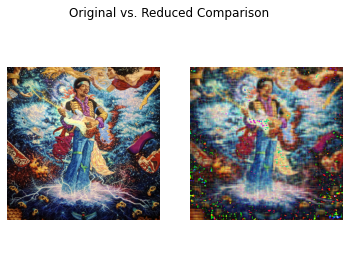

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Original vs. Reduced Comparison (IT#27)", fontsize=12)
ax1.imshow(X)
ax1.axis("equal")
ax1.axis("off")
ax2.imshow(good_enough)
ax2.axis("equal")
ax2.axis("off")
plt.show()